## How do albedo, NDVI, and fPAR vary throughout the seasons? 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

import seaborn as sns 


In [3]:
path_to_projections = "/Users/colettebrown/Library/CloudStorage/GoogleDrive-coletteb@berkeley.edu/Shared drives/Tram/data/projections/"

In [4]:
group_order = ['spring_snow_', 'spring_transition_', 'spring_no_snow_', 'peak_NDVI_', 'fall_no_snow_']
variables = ['Albedo', 'NDVI', 'fPAR', 'Net_rad']
years = ['2014', '2015', '2016', '2017']

polygon_types = {
    1: 'Trough & LCP',
    2: 'Trough & FCP',
    3: 'Trough & HCP',
    4: 'Center & LCP',
    5: 'Center & FCP',
    7: 'High & LCP',
    8: 'High & FCP',
    9: 'High & HCP'
}


In [5]:
all_data = pd.DataFrame()

for group in group_order:
    for variable in variables:
        file_pattern = os.path.join(path_to_projections, f"{group}{variable}_*.txt")
        for file in glob.glob(file_pattern):
            file_name = os.path.basename(file)
            year = file_name[-8:-4]
            
            df = pd.read_csv(file)
            df['Group'] = group
            df['Variable'] = variable
            df['year'] = year
            
            all_data = pd.concat([all_data, df], ignore_index=True)

all_data.replace(polygon_types, inplace=True)


In [6]:
all_data

,e05,e06,e00,Var4,Group,Variable,year
0,585332.46,7909903.8,High & FCP,0.792,spring_snow_,Albedo,2016
1,585332.46,7909904.3,High & FCP,0.818,spring_snow_,Albedo,2016
2,585332.46,7909904.8,High & FCP,0.818,spring_snow_,Albedo,2016
3,585332.46,7909905.3,High & FCP,0.798,spring_snow_,Albedo,2016
4,585332.46,7909905.8,High & FCP,0.814,spring_snow_,Albedo,2016
...,...,...,...,...,...,...,...
106621939,585992.96,7910676.8,NaN,0.000,fall_no_snow_,Net_rad,2014
106621940,585992.96,7910677.3,NaN,0.000,fall_no_snow_,Net_rad,2014
106621941,585992.96,7910677.8,NaN,0.000,fall_no_snow_,Net_rad,2014
106621942,585992.96,7910678.3,NaN,0.000,fall_no_snow_,Net_rad,2014


In [73]:
avg_per_season = all_data.groupby(['Group', 'Variable'], as_index=False).agg(
    mean_var4=('Var4', 'mean'),
    std_var4 = ('Var4', 'std')
)

# avg_per_season = avg_per_season.loc[(avg_per_season['e00'] != 'High & HCP') & (avg_per_season['e00'] != 'Trough & HCP')]
avg_per_season= avg_per_season.loc[avg_per_season['Variable'] != 'Net_rad']

print(avg_per_season)
group_order = ['spring_snow_', 'spring_transition_', 'spring_no_snow_', 'peak_NDVI_', 'fall_no_snow_']

avg_per_season['Group'] = pd.Categorical(avg_per_season['Group'], categories=group_order, ordered=True)
avg_per_season = avg_per_season.sort_values('Group')
print(avg_per_season)


                 Group Variable  mean_var4  std_var4
0        fall_no_snow_   Albedo  -0.024628  0.068665
1        fall_no_snow_     NDVI   0.247362  0.203557
3        fall_no_snow_     fPAR   0.575444  0.462865
4           peak_NDVI_   Albedo   0.083667  0.069841
5           peak_NDVI_     NDVI   0.319126  0.265532
7           peak_NDVI_     fPAR   0.574636  0.462235
8      spring_no_snow_   Albedo   0.080327  0.068996
9      spring_no_snow_     NDVI   0.180579  0.158116
11     spring_no_snow_     fPAR   0.564676  0.454415
12        spring_snow_   Albedo   0.497382  0.401028
13        spring_snow_     NDVI  -0.068379  0.060392
15        spring_snow_     fPAR   0.058544  0.055147
16  spring_transition_   Albedo   0.278360  0.255910
17  spring_transition_     NDVI   0.019285  0.172915
19  spring_transition_     fPAR   0.295655  0.299530
                 Group Variable  mean_var4  std_var4
12        spring_snow_   Albedo   0.497382  0.401028
13        spring_snow_     NDVI  -0.068379  0.

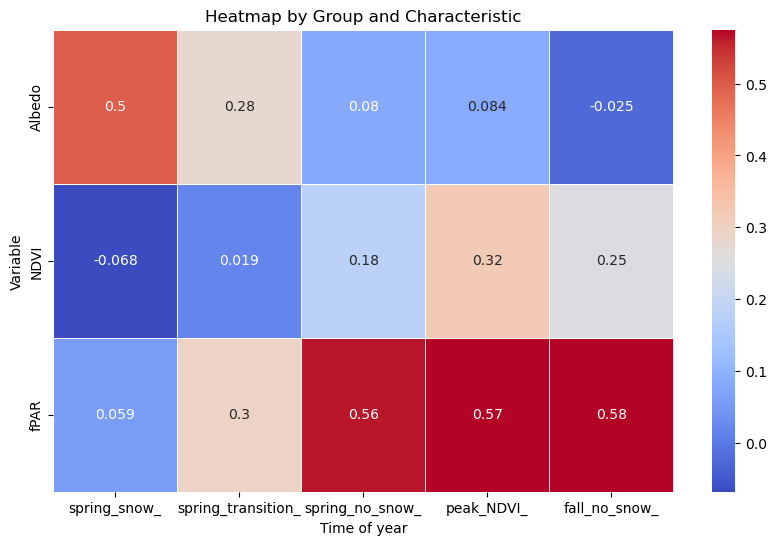

In [74]:
pivot_all = avg_per_season.pivot(index='Variable', columns='Group', values='mean_var4')
pivot_all=pivot_all[group_order]

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_all, annot=True, cmap='coolwarm', linewidths= 0.5)
plt.title('Heatmap by Group and Characteristic')
plt.xlabel('Time of year')
plt.show()

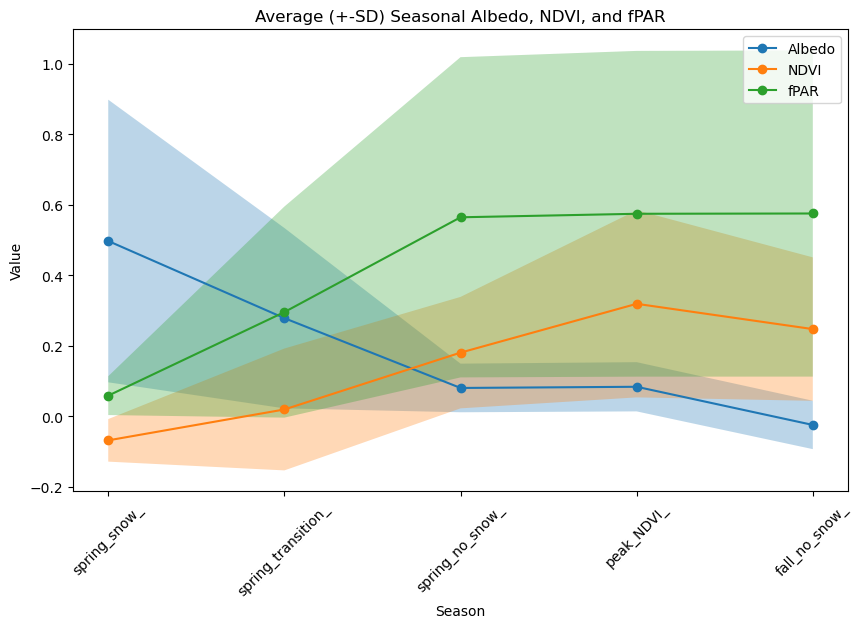

In [37]:
plt.figure(figsize=(10, 6))
# palette = sns.color_palette('viridis', n_colors=3)

for variable, data in avg_per_season.groupby('Variable'):
    plt.plot(data['Group'], data['mean_var4'], marker='o', label=variable)
    plt.fill_between(data['Group'],
                     data['mean_var4'] - data['std_var4'],
                     data['mean_var4'] + data['std_var4'],
                     alpha = 0.3)
plt.legend()
plt.title('Average (+-SD) Seasonal Albedo, NDVI, and fPAR')
plt.xlabel('Season')
plt.xticks(rotation=45)

plt.ylabel('Value')
plt.show()


## Variation across topo feature and polygon type

In [63]:
avg_per_season = all_data.groupby(['Group', 'Variable', 'e00'], as_index=False).agg(
    mean_var4=('Var4', 'mean'),
    std_var4 = ('Var4', 'std')
)

avg_per_season = avg_per_season.loc[(avg_per_season['e00'] != 'High & HCP') & (avg_per_season['e00'] != 'Trough & HCP')]
avg_per_season= avg_per_season.loc[avg_per_season['Variable'] != 'Net_rad']

group_order = ['spring_snow_', 'spring_transition_', 'spring_no_snow_', 'peak_NDVI_', 'fall_no_snow_']

avg_per_season['Group'] = pd.Categorical(avg_per_season['Group'], categories=group_order, ordered=True)
avg_per_season = avg_per_season.sort_values('Group')

In [48]:
avg_per_season

,Group,Variable,e00,mean_var4,std_var4
120,spring_snow_,fPAR,Center & FCP,0.089104,0.036822
124,spring_snow_,fPAR,High & LCP,0.111424,0.037522
122,spring_snow_,fPAR,High & FCP,0.094506,0.040795
121,spring_snow_,fPAR,Center & LCP,0.094400,0.029348
111,spring_snow_,NDVI,Trough & LCP,-0.108903,0.014247
...,...,...,...,...,...
28,fall_no_snow_,fPAR,High & LCP,0.947212,0.002862
29,fall_no_snow_,fPAR,Trough & FCP,0.951550,0.004909
31,fall_no_snow_,fPAR,Trough & LCP,0.949993,0.001633
12,fall_no_snow_,NDVI,High & LCP,0.389508,0.021769


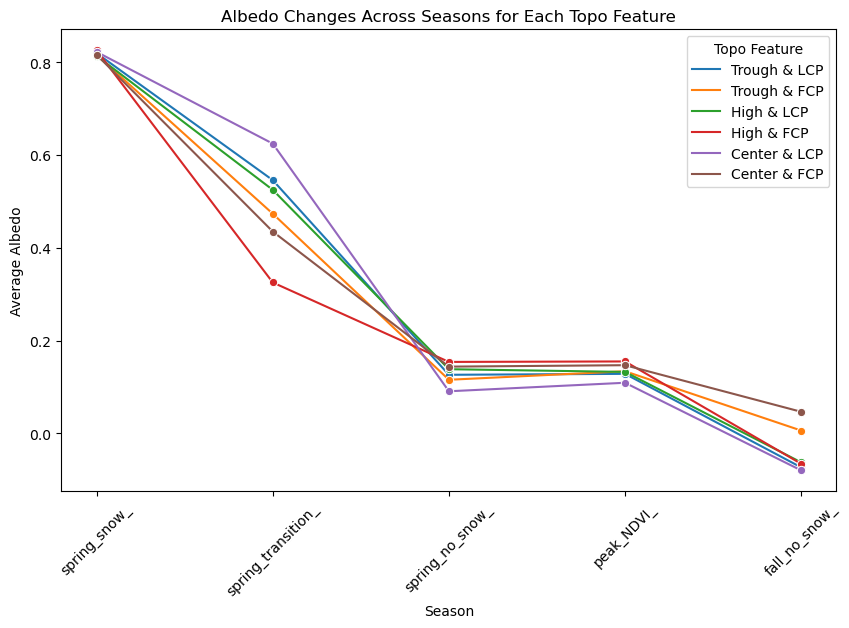

In [52]:
import seaborn as sns 

albedo_filter = avg_per_season[avg_per_season['Variable'] == 'Albedo']

plt.figure(figsize=(10, 6))
sns.lineplot(x='Group', y='mean_var4', hue='e00', data=albedo_filter, marker='o')
plt.title('Albedo Changes Across Seasons for Each Topo Feature')
plt.xlabel('Season')
plt.ylabel('Average Albedo')
plt.xticks(rotation=45)
plt.legend(title='Topo Feature')
plt.show()

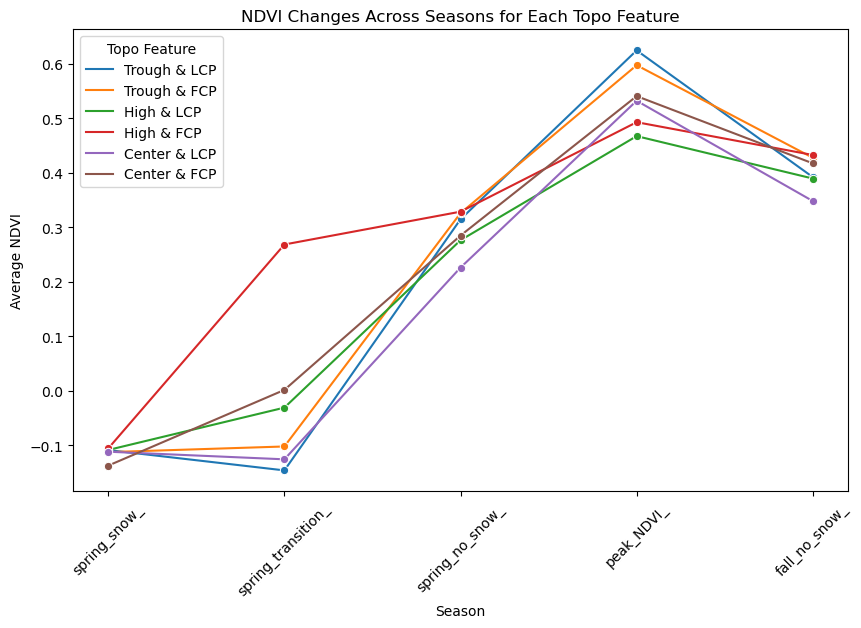

In [54]:
ndvi_filter = avg_per_season[avg_per_season['Variable'] == 'NDVI']

plt.figure(figsize=(10, 6))
sns.lineplot(x='Group', y='mean_var4', hue='e00', data=ndvi_filter, marker='o')
plt.title('NDVI Changes Across Seasons for Each Topo Feature')
plt.xlabel('Season')
plt.ylabel('Average NDVI')
plt.xticks(rotation=45)
plt.legend(title='Topo Feature')
plt.show()

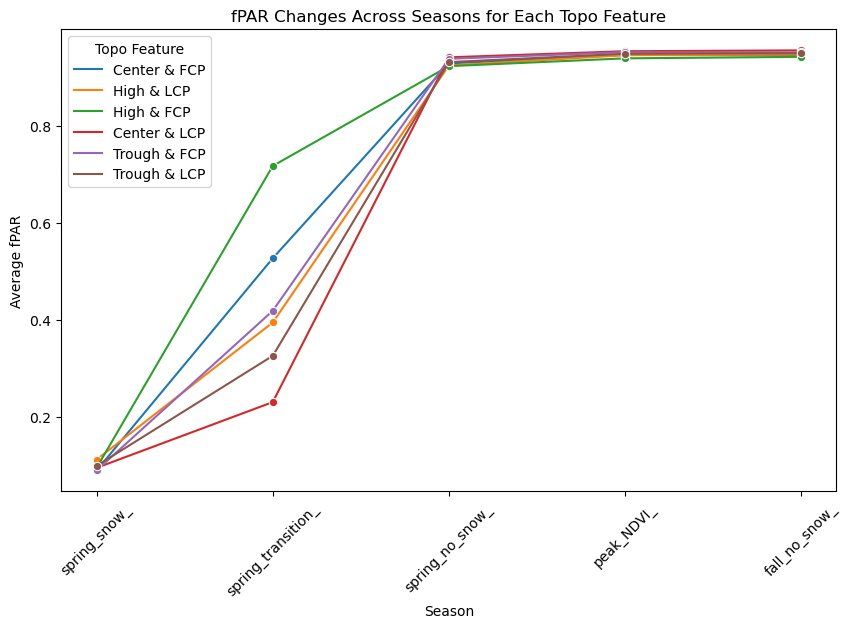

In [61]:
fpar_filter = avg_per_season[avg_per_season['Variable'] == 'fPAR']

plt.figure(figsize=(10, 6))
sns.lineplot(x='Group', y='mean_var4', hue='e00', data=fpar_filter, marker='o')
plt.title('fPAR Changes Across Seasons for Each Topo Feature')
plt.xlabel('Season')
plt.ylabel('Average fPAR')
plt.xticks(rotation=45)
plt.legend(title='Topo Feature')
plt.show()

In [64]:
avg_per_season = all_data.groupby(['Group', 'Variable', 'e00', 'year'], as_index=False).agg(
    mean_var4=('Var4', 'mean'),
    std_var4 = ('Var4', 'std')
)

avg_per_season = avg_per_season.loc[(avg_per_season['e00'] != 'High & HCP') & (avg_per_season['e00'] != 'Trough & HCP')]
avg_per_season= avg_per_season.loc[avg_per_season['Variable'] != 'Net_rad']

group_order = ['spring_snow_', 'spring_transition_', 'spring_no_snow_', 'peak_NDVI_', 'fall_no_snow_']

avg_per_season['Group'] = pd.Categorical(avg_per_season['Group'], categories=group_order, ordered=True)
avg_per_season = avg_per_season.sort_values('Group')

In [66]:
avg_per_season

,Group,Variable,e00,year,mean_var4,std_var4
311,spring_snow_,fPAR,Trough & FCP,2014,0.084752,0.022882
261,spring_snow_,NDVI,High & LCP,2016,-0.115167,0.001951
262,spring_snow_,NDVI,High & LCP,2017,-0.092333,0.002891
263,spring_snow_,NDVI,Trough & FCP,2014,-0.120414,0.010505
264,spring_snow_,NDVI,Trough & FCP,2016,-0.113965,0.004611
...,...,...,...,...,...,...
26,fall_no_snow_,fPAR,High & FCP,2014,0.942474,0.003218
28,fall_no_snow_,fPAR,High & LCP,2014,0.947212,0.002862
29,fall_no_snow_,fPAR,Trough & FCP,2014,0.951550,0.004909
12,fall_no_snow_,NDVI,High & LCP,2014,0.389508,0.021769


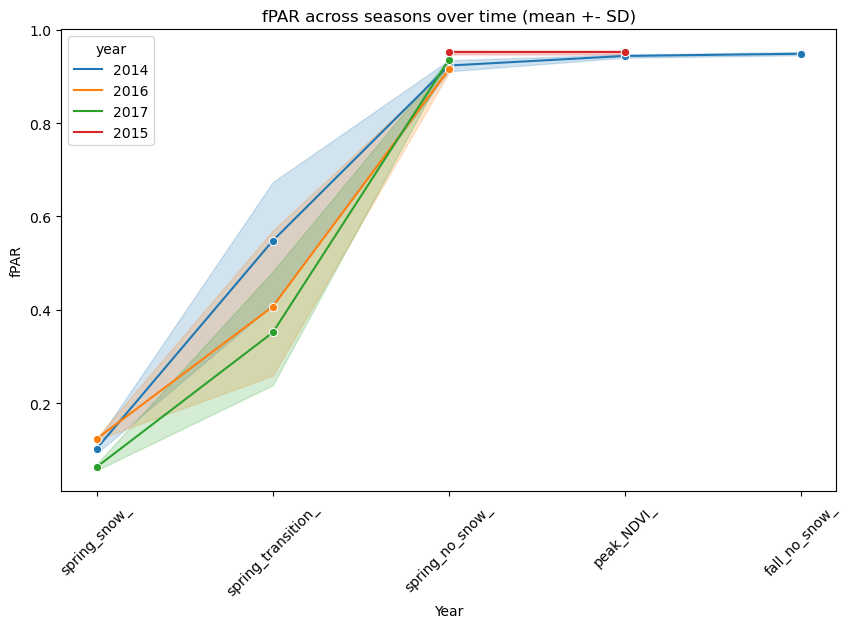

In [67]:
fpar_filter = avg_per_season[avg_per_season['Variable'] == 'fPAR']

plt.figure(figsize=(10, 6))
sns.lineplot(x='Group', y='mean_var4', hue='year', data=fpar_filter, marker='o')
plt.title('fPAR across seasons over time (mean +- SD)')
plt.xlabel('Year')
plt.ylabel('fPAR')
plt.xticks(rotation=45)
plt.legend(title='year')
plt.show()

In [69]:
avg_per_season = all_data.groupby(['Group', 'Variable', 'year'], as_index=False).agg(
    mean_var4=('Var4', 'mean'),
    std_var4 = ('Var4', 'std')
)

# avg_per_season = avg_per_season.loc[(avg_per_season['e00'] != 'High & HCP') & (avg_per_season['e00'] != 'Trough & HCP')]
avg_per_season= avg_per_season.loc[avg_per_season['Variable'] != 'Net_rad']

group_order = ['spring_snow_', 'spring_transition_', 'spring_no_snow_', 'peak_NDVI_', 'fall_no_snow_']

avg_per_season['Group'] = pd.Categorical(avg_per_season['Group'], categories=group_order, ordered=True)
avg_per_season = avg_per_season.sort_values('Group')

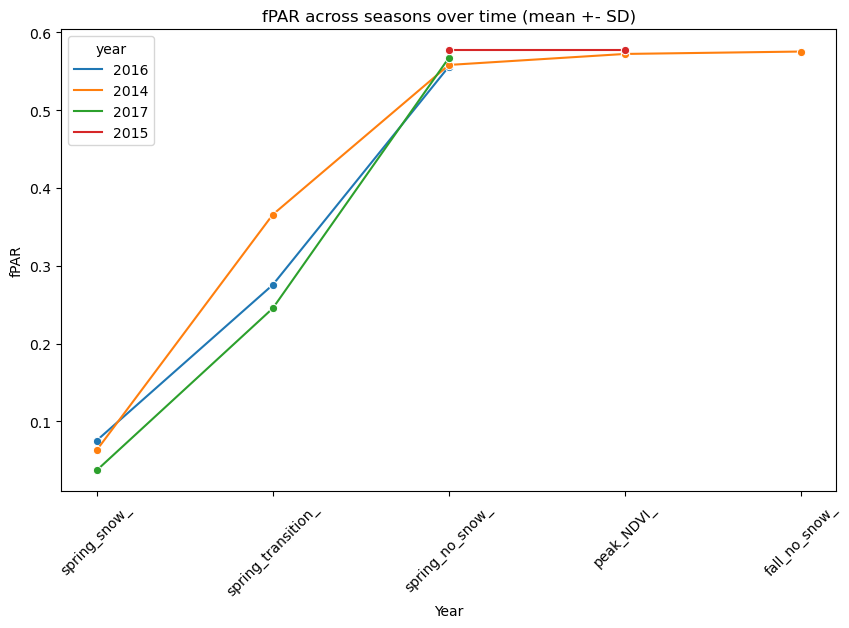

In [70]:
fpar_filter = avg_per_season[avg_per_season['Variable'] == 'fPAR']

plt.figure(figsize=(10, 6))
sns.lineplot(x='Group', y='mean_var4', hue='year', data=fpar_filter, marker='o')
plt.title('fPAR across seasons over time (mean +- SD)')
plt.xlabel('Year')
plt.ylabel('fPAR')
plt.xticks(rotation=45)
plt.legend(title='year')
plt.show()